# <font color = lightcoral>Startover with basic ML Model
>    
>Startover

## <font color = grey> Admin

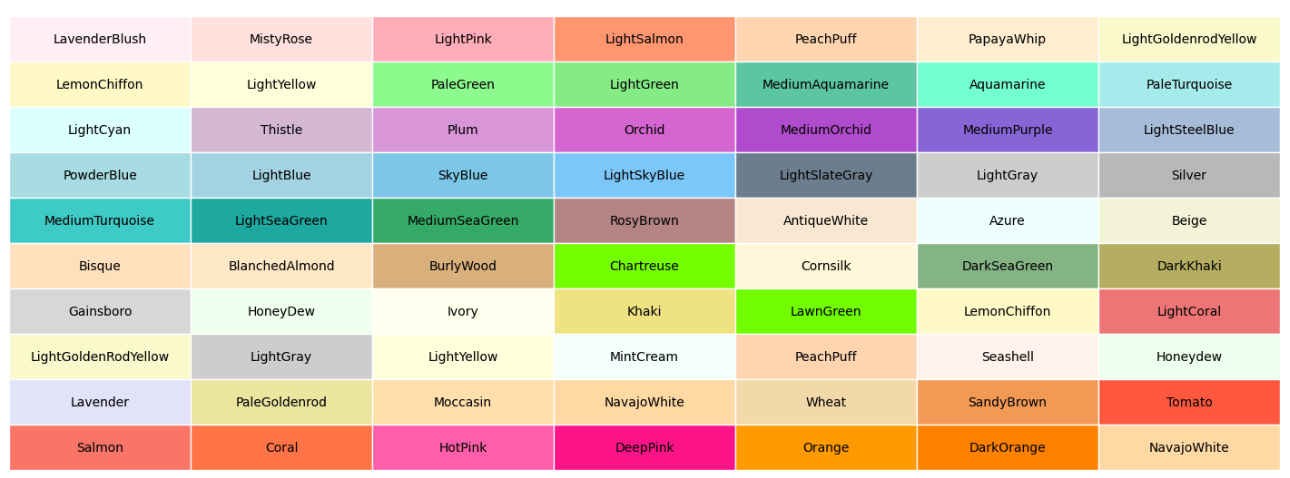

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /home/sagemaker-user


___
# <font color = darkkhaki> (D). Feature Engg - Advanced (TBD)

### Read Converted Parquet file

In [9]:
import pandas as pd

# Define the target folder and file path
target_folder = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl'
parquet_file_path = os.path.join(target_folder, 'train.parquet')

# Read the Parquet file
train_df = pd.read_parquet(parquet_file_path)

# Display the first few lines
print(train_df.head())

        0           1           2           3           4           5      \
0  [1840cbfe]  [65f23e3e]  [147cfcff]        None        None        None   
1  [1840cbfe]  [1840cbfe]  [828a502b]  [828a502b]  [1840cbfe]  [1840cbfe]   
2  [40645e82]  [ea3efa0b]  [40645e82]  [ea3efa0b]  [40645e82]  [ea3efa0b]   
3  [fc5f0940]  [fc5f0940]  [fc5f0940]  [fc5f0940]  [fc5f0940]  [fc5f0940]   
4  [c70dad25]  [1840cbfe]  [1840cbfe]  [1840cbfe]  [65f23e3e]  [65f23e3e]   

        6           7           8           9           10          11     \
0        None        None        None        None        None        None   
1  [1840cbfe]  [1840cbfe]  [1840cbfe]  [1840cbfe]  [1840cbfe]  [1840cbfe]   
2  [40645e82]  [ea3efa0b]        None        None        None        None   
3  [fc5f0940]  [fc5f0940]  [fc5f0940]  [fc5f0940]  [fc5f0940]  [fc5f0940]   
4  [65f23e3e]  [65f23e3e]  [65f23e3e]  [65f23e3e]  [65f23e3e]  [65f23e3e]   

        12          13          14          15          16          17    

In [10]:
# Get the number of rows and columns
num_rows, num_columns = train_df.shape
print(f'The DataFrame has {num_rows} rows and {num_columns} columns.')

The DataFrame has 13718 rows and 47504 columns.


### Counts

In [5]:
# import pandas as pd
# import os

# # Define the target folder and file paths
# target_folder = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl'
# train_file_path = os.path.join(target_folder, 'train.parquet')
# test_normal_file_path = os.path.join(target_folder, 'test_normal.parquet')
# test_abnormal_file_path = os.path.join(target_folder, 'test_abnormal.parquet')

# # Read the Parquet files
# train_df = pd.read_parquet(train_file_path)
# test_normal_df = pd.read_parquet(test_normal_file_path)
# test_abnormal_df = pd.read_parquet(test_abnormal_file_path)

# # Function to get summary stats
# def get_summary_stats(df, name):
#     num_rows, num_columns = df.shape
#     print(f'{name} DataFrame has {num_rows} rows and {num_columns} columns.')
#     # print(f'{name} DataFrame head:\n{df.head()}')
#     # print(f'{name} DataFrame summary stats:\n{df.describe(include="all")}')
#     # print(f'{name} DataFrame non-null counts:\n{df.count()}')
#     print('-' * 80)

# # Get summary stats for each DataFrame
# get_summary_stats(train_df, 'Train')
# get_summary_stats(test_normal_df, 'Test Normal')
# get_summary_stats(test_abnormal_df, 'Test Abnormal')

___
# <font color = tomato> PreProcess Data

#### Run and Save

In [11]:
# %%time

# import pandas as pd
# import numpy as np
# import os

# # Function to preprocess the data
# def preprocess_data(df):
#     # Replace None with np.nan
#     df.replace([None], np.nan, inplace=True)
#     # Fill NaN values with a placeholder value or statistic
#     df.fillna('0', inplace=True)
    
#     # Convert hexadecimal strings to integers
#     def convert_hex_to_int(x):
#         if isinstance(x, list) and len(x) == 1:
#             return int(x[0], 16)
#         return 0  # or another placeholder if the list is empty or not as expected
    
#     df = df.applymap(convert_hex_to_int)
    
#     return df

# # Define the target folder
# target_folder = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl'

# # Define file paths
# file_paths = {
#     'train': os.path.join(target_folder, 'train.parquet'),
#     'test_normal': os.path.join(target_folder, 'test_normal.parquet'),
#     'test_abnormal': os.path.join(target_folder, 'test_abnormal.parquet')
# }

# # Process each file
# for file_key, file_path in file_paths.items():
#     # Read the Parquet file
#     df = pd.read_parquet(file_path)
    
#     # Preprocess data
#     df = preprocess_data(df)
    
#     # Save the preprocessed DataFrame as a Parquet file
#     preprocessed_file_path = os.path.join(target_folder, f'{file_key}_preprocessed.parquet')
#     df.to_parquet(preprocessed_file_path)
    
#     print(f'Preprocessed {file_key} data saved to {preprocessed_file_path}')

In [14]:
import pandas as pd
import os

# Define the target folder
target_folder = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl'

# Define file paths
file_paths = {
    # 'train': os.path.join(target_folder, 'train.parquet'),
    # 'test_normal': os.path.join(target_folder, 'test_normal.parquet'),
    'test_abnormal': os.path.join(target_folder, 'test_abnormal.parquet')
}

# Inspect each file
for file_key, file_path in file_paths.items():
    df = pd.read_parquet(file_path)
    print(f'--- {file_key} ---')
    print(f'Number of rows: {df.shape[0]}')
    print(f'Number of columns: {df.shape[1]}')
    print(df.head())
    print(df.dtypes)
    print('\n')


--- test_abnormal ---
Number of rows: 3018
Number of columns: 20447
        0           1           2           3           4           5      \
0  [fd2fdc47]  [fd2fdc47]  [fd2fdc47]  [fd2fdc47]  [fd2fdc47]  [fd2fdc47]   
1  [1b5a0a61]  [1b5a0a61]  [1b5a0a61]  [1b5a0a61]  [1b5a0a61]  [1b5a0a61]   
2  [fc5f0940]  [d59f04cd]  [0259e53a]  [a111fe6f]  [0b5734c3]  [0259e53a]   
3  [64dc455d]  [64dc455d]  [64dc455d]  [64dc455d]  [64dc455d]  [64dc455d]   
4  [8fab64d7]  [f9631383]  [8fab64d7]  [8fab64d7]  [f9631383]  [8fab64d7]   

        6           7           8           9           10          11     \
0  [fd2fdc47]  [fd2fdc47]  [fd2fdc47]  [fd2fdc47]  [fd2fdc47]  [fd2fdc47]   
1  [1b5a0a61]  [1b5a0a61]  [1b5a0a61]  [1b5a0a61]  [1b5a0a61]  [1b5a0a61]   
2  [1f5adb7d]  [1f5adb7d]  [ad738237]  [693e1c03]  [b15df703]  [b15df703]   
3  [64dc455d]  [64dc455d]  [64dc455d]  [64dc455d]  [64dc455d]  [64dc455d]   
4  [f9631383]  [f9631383]  [8fab64d7]  [f9631383]  [8fab64d7]  [f9631383]   

      

#### Convert from hex to integer --> Claude **WORKED**

In [19]:
import pandas as pd

def hex_to_int(hex_list):
    if hex_list is None or len(hex_list) == 0:
        return 0  # Return 0 for None or empty lists
    try:
        return int(hex_list[0][1:-1], 16)
    except (ValueError, IndexError, TypeError):
        return 0  # Return 0 for any conversion errors

# Read the parquet file
df = pd.read_parquet('/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/test_abnormal.parquet')

# Apply the conversion function to all columns
df = df.applymap(hex_to_int)

# If you want to save the result back to a parquet file
# df.to_parquet('/path/to/output/converted_test_abnormal.parquet')

# Display the first few rows of the converted dataframe
print(df.head())

      0         1         2         3         4         5         6      \
0  13827524  13827524  13827524  13827524  13827524  13827524  13827524   
1  11903142  11903142  11903142  11903142  11903142  11903142  11903142   
2  12972180   5894220   2465363   1122278  11891532   2465363  16100791   
3   5096533   5096533   5096533   5096533   5096533   5096533   5096533   
4  16430669   9843000  16430669  16430669   9843000  16430669   9843000   

      7         8         9         10        11        12        13     \
0  13827524  13827524  13827524  13827524  13827524  13827524  13827524   
1  11903142  11903142  11903142  11903142  11903142  11903142  11903142   
2  16100791  14104611   9691584   1433456   1433456  16035069  13778025   
3   5096533   5096533   5096533   5096533   5096533   5096533   5096533   
4   9843000  16430669   9843000  16430669   9843000  16430669   9843000   

      14        15        16        17        18        19        20     \
0  13827524  13827524  

#### Unique values check --> 943 **GOOD**

In [21]:
import pandas as pd
import numpy as np

# Assuming you've already loaded and converted your DataFrame as 'df'

# Flatten the DataFrame into a single 1D numpy array and count unique values
unique_count = np.unique(df.values.flatten()).size

print(f"The number of distinct integers across the entire DataFrame is: {unique_count}")

# If you want to see the actual unique values:
unique_values = np.unique(df.values.flatten())
print("\nUnique values:")
print(unique_values)

# If you want to see the count of each unique value:
value_counts = pd.Series(df.values.flatten()).value_counts()
print("\nValue counts:")
print(value_counts)

The number of distinct integers across the entire DataFrame is: 943

Unique values:
[       0     6077     7185    22384    31669    37018    43786    65868
    74162    85041    89198    90562   107891   111181   133133   155125
   213868   221920   234476   255235   268510   279222   285754   293782
   304779   321217   333376   350990   398879   411112   418585   428235
   440179   464923   529895   584822   622768   636839   658158   664041
   665594   672099   692194   714801   722141   736148   743820   765002
   771956   776639   800032   800214   810251   814208   822714   824650
   830727   843484   870674   884829   889396   904754   921255   924872
   977756   982548  1051090  1080147  1088161  1099767  1104738  1122129
  1122278  1157577  1180072  1213783  1214180  1227407  1245332  1260039
  1280565  1287620  1318031  1340605  1350509  1351773  1357957  1359289
  1382922  1393759  1398679  1420972  1433317  1433456  1459876  1466699
  1478710  1483907  1491667  1517945  15

#### Revise current function to preprocess the 3 files

In [23]:
import pandas as pd
import os

# Function to preprocess the data
def preprocess_data(df):
    # Convert hexadecimal strings to integers
    def hex_to_int(hex_list):
        if hex_list is None or len(hex_list) == 0:
            return 0  # Return 0 for None or empty lists
        try:
            return int(hex_list[0][1:-1], 16)
        except (ValueError, IndexError, TypeError):
            return 0  # Return 0 for any conversion errors

    df = df.applymap(hex_to_int)
    
    return df

# Define the target folder
target_folder = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl'

# Define file paths
file_paths = {
    'train': os.path.join(target_folder, 'train.parquet'),
    'test_normal': os.path.join(target_folder, 'test_normal.parquet'),
    'test_abnormal': os.path.join(target_folder, 'test_abnormal.parquet')
}

# Process each file
for file_key, file_path in file_paths.items():
    # Read the Parquet file
    df = pd.read_parquet(file_path)
    
    # Preprocess data
    df = preprocess_data(df)
    
    # Save the preprocessed DataFrame as a Parquet file
    preprocessed_file_path = os.path.join(target_folder, f'{file_key}_preprocessed.parquet')
    df.to_parquet(preprocessed_file_path)
    
    print(f'Preprocessed {file_key} data saved to {preprocessed_file_path}')

# Function to display file info
def display_file_info(file_key, file_path):
    df = pd.read_parquet(file_path)
    print(f'--- {file_key} ---')
    print(f'Number of rows: {df.shape[0]}')
    print(f'Number of columns: {df.shape[1]}')
    # print(df.head())
    print('\n')

# Display info for each file
for file_key, file_path in file_paths.items():
    preprocessed_file_path = os.path.join(target_folder, f'{file_key}_preprocessed.parquet')
    display_file_info(file_key, preprocessed_file_path)

Preprocessed train data saved to /mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/train_preprocessed.parquet
Preprocessed test_normal data saved to /mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/test_normal_preprocessed.parquet
Preprocessed test_abnormal data saved to /mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/test_abnormal_preprocessed.parquet
--- train ---
Number of rows: 13718
Number of columns: 47504


--- test_normal ---
Number of rows: 20579
Number of columns: 42794


--- test_abnormal ---
Number of rows: 3018
Number of columns: 20447




#### Load and Review

In [24]:
import pandas as pd
import os

# Define the target folder
target_folder = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl'

# Define file paths for the preprocessed files
file_paths = {
    # 'train': os.path.join(target_folder, 'train_preprocessed.parquet')
    # ,
    'test_normal': os.path.join(target_folder, 'test_normal_preprocessed.parquet')
    ,
    # 'test_abnormal': os.path.join(target_folder, 'test_abnormal_preprocessed.parquet')
}

# Function to display file info
def display_file_info(file_key, file_path):
    df = pd.read_parquet(file_path)
    print(f'--- {file_key} ---')
    print(f'Number of rows: {df.shape[0]}')
    print(f'Number of columns: {df.shape[1]}')
    print(df.head())
    print('\n')

# Display info for each file
for file_key, file_path in file_paths.items():
    display_file_info(file_key, file_path)

--- test_normal ---
Number of rows: 20579
Number of columns: 42794
      0         1        2         3        4         5        6        7      \
0   8654015   8654015  8654015   6235107  6235107   6235107  6235107  6235107   
1    411112  10743712   411112  10743712   411112  10743712   411112   411112   
2  10975928         0        0         0        0         0        0        0   
3  11161828         0        0         0        0         0        0        0   
4  12504070         0        0         0        0         0        0        0   

     8         9         10        11       12       13       14        15     \
0  6235107   6235107   4706255   6235107  6235107  4706255  6235107   6235107   
1   411112  10743712  10743712  10743712   411112   411112   411112  10743712   
2        0         0         0         0        0        0        0         0   
3        0         0         0         0        0        0        0         0   
4        0         0         0         0 

___
# <font color = darkkhaki> Decision Tree - Basic

In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load data
train_path = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/train_preprocessed.parquet'
test_normal_path = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/test_normal_preprocessed.parquet'
test_abnormal_path = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/test_abnormal_preprocessed.parquet'

train_df = pd.read_parquet(train_path)
test_normal_df = pd.read_parquet(test_normal_path)
test_abnormal_df = pd.read_parquet(test_abnormal_path)

# Adjusting the number of columns to be the same across all datasets
max_columns = max(train_df.shape[1], test_normal_df.shape[1], test_abnormal_df.shape[1])
train_df = train_df.reindex(columns=range(max_columns), fill_value=0)
test_normal_df = test_normal_df.reindex(columns=range(max_columns), fill_value=0)
test_abnormal_df = test_abnormal_df.reindex(columns=range(max_columns), fill_value=0)

In [29]:
# Use a portion of test_abnormal_df as class 1 training data
abnormal_train_portion = test_abnormal_df.sample(frac=0.3, random_state=42)  # Adjust the fraction as needed
remaining_abnormal_test = test_abnormal_df.drop(abnormal_train_portion.index)

# Combine real and synthetic data
X_train_combined = pd.concat([train_df, abnormal_train_portion])
y_train_combined = [0] * train_df.shape[0] + [1] * abnormal_train_portion.shape[0]

In [30]:
# Define labels for test sets
y_test_normal = [0] * test_normal_df.shape[0]
y_test_abnormal = [1] * remaining_abnormal_test.shape[0]

# Scale the features
scaler = StandardScaler()
X_train_combined_scaled = scaler.fit_transform(X_train_combined)
X_test_normal_scaled = scaler.transform(test_normal_df)
X_test_abnormal_scaled = scaler.transform(remaining_abnormal_test)

In [31]:
# Reduce dimensionality with PCA
pca = PCA(n_components=100)  # Adjust n_components based on the explained variance
X_train_pca = pca.fit_transform(X_train_combined_scaled)
X_test_normal_pca = pca.transform(X_test_normal_scaled)
X_test_abnormal_pca = pca.transform(X_test_abnormal_scaled)

In [32]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train_combined)

LogisticRegression(max_iter=1000)

In [33]:
# Predict on test_normal data
y_pred_normal = model.predict(X_test_normal_pca)
accuracy_normal = accuracy_score(y_test_normal, y_pred_normal)

In [34]:
# Predict on test_abnormal data
y_pred_abnormal = model.predict(X_test_abnormal_pca)
accuracy_abnormal = accuracy_score(y_test_abnormal, y_pred_abnormal)

In [35]:
print(f"Accuracy on normal test data: {accuracy_normal}")
print(f"Accuracy on abnormal test data: {accuracy_abnormal}")

Accuracy on normal test data: 0.9967928470771175
Accuracy on abnormal test data: 0.12920018930430668


___
# <font color = darkkhaki> M.12: Bert - Basic

### Step 1: Prepare the Data


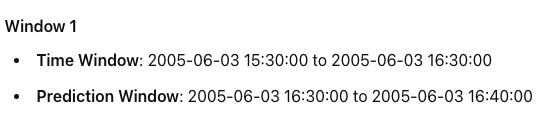

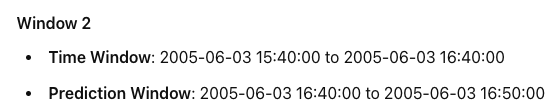

In [8]:
import pandas as pd

# Load the data
file_path = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/20240701_BGL_Log_Structuted_v1.00.csv'
df = pd.read_csv(file_path)

# Print the minimum and maximum dates
print(f"Minimum Date: {df['Date'].min()}")
print(f"Maximum Date: {df['Date'].max()}")

Minimum Date: 2005.06.03
Maximum Date: 2006.01.04


In [10]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch

# Load the data
file_path = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/20240701_BGL_Log_Structuted_v1.00.csv'
df = pd.read_csv(file_path)

# Extract only the relevant parts of the Time column (removing date if it's duplicated)
df['Time'] = df['Time'].str.split('-').str[-1]

# Convert Date and Time columns to datetime
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y.%m.%d %H.%M.%S.%f')

# Sort the data by datetime
df = df.sort_values(by='datetime')

# Select relevant columns
df = df[['datetime', 'Component1', 'Component2', 'Level', 'label_binary']]

# Function to create rolling window features
def create_rolling_window_features(df, window_size, prediction_window):
    X = []
    y = []
    for end_time in pd.date_range(start=df['datetime'].min(), end=df['datetime'].max(), freq='10T'):
        start_time = end_time - timedelta(minutes=window_size)
        prediction_time = end_time + timedelta(minutes=prediction_window)
        
        window_data = df[(df['datetime'] >= start_time) & (df['datetime'] < end_time)]
        prediction_data = df[(df['datetime'] >= end_time) & (df['datetime'] < prediction_time)]
        
        if not window_data.empty and not prediction_data.empty:
            text = ' '.join(window_data['Component1'].astype(str)) + ' ' + \
                   ' '.join(window_data['Component2'].astype(str)) + ' ' + \
                   ' '.join(window_data['Level'].astype(str))
            label = prediction_data['label_binary'].max()  # Take the max label as the prediction label
            
            X.append(text)
            y.append(label)
    
    return X, y

# Create rolling window features
window_size = 60  # 60 minutes
prediction_window = 10  # 10 minutes
X, y = create_rolling_window_features(df, window_size, prediction_window)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Create the Model

In [12]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True)

# Convert data to HuggingFace Datasets
train_dataset = Dataset.from_dict({'text': X_train, 'label': y_train})
test_dataset = Dataset.from_dict({'text': X_test, 'label': y_test})

train_dataset = train_dataset.map(lambda e: tokenizer(e['text'], padding="max_length", truncation=True), batched=True)
test_dataset = test_dataset.map(lambda e: tokenizer(e['text'], padding="max_length", truncation=True), batched=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7655 [00:00<?, ? examples/s]

Map:   0%|          | 0/1914 [00:00<?, ? examples/s]

### Step 4: Train the Model

In [13]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

In [14]:
# Define training arguments with adjustments for faster training
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='steps',
    eval_steps=500,  # Evaluate every 500 steps
    logging_dir='./logs',
    logging_steps=100,  # Log every 100 steps
    learning_rate=5e-5,  # Reduced learning rate
    per_device_train_batch_size=16,  # Increased batch size if memory allows
    per_device_eval_batch_size=16,  # Increased batch size if memory allows
    num_train_epochs=1,  # Reduced number of epochs
    weight_decay=0.01,
    fp16=True,  # Enable mixed precision training
)

# Define Trainer with adjusted training arguments
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

TrainOutput(global_step=479, training_loss=0.29039111764545483, metrics={'train_runtime': 138.0713, 'train_samples_per_second': 55.442, 'train_steps_per_second': 3.469, 'total_flos': 2014115128780800.0, 'train_loss': 0.29039111764545483, 'epoch': 1.0})

### Step 5: Save the Model

In [15]:
# Define the save directory
save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240701_Baseline_Bert_Full_OpenAI'

# Create the directory if it doesn't exist
import os
os.makedirs(save_dir, exist_ok=True)

# Save the model
model.save_pretrained(save_dir)

# Save the tokenizer
tokenizer.save_pretrained(save_dir)

('/mnt/efs-w210-capstone/200015/09.Models/20240701_Baseline_Bert_Full_OpenAI/tokenizer_config.json',
 '/mnt/efs-w210-capstone/200015/09.Models/20240701_Baseline_Bert_Full_OpenAI/special_tokens_map.json',
 '/mnt/efs-w210-capstone/200015/09.Models/20240701_Baseline_Bert_Full_OpenAI/vocab.txt',
 '/mnt/efs-w210-capstone/200015/09.Models/20240701_Baseline_Bert_Full_OpenAI/added_tokens.json')

### Step 7: Load the saved model

In [16]:
from transformers import BertTokenizer, BertForSequenceClassification

# Define the save directory
save_dir = '/mnt/efs-w210-capstone/200015/09.Models/20240701_Baseline_Bert_OpenAI'

# Load the model
model = BertForSequenceClassification.from_pretrained(save_dir)

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained(save_dir)

### Step 8: Evaluate the Model

### auto metrics

In [17]:
# # Evaluate the model
# results = trainer.evaluate()

# print(f"Test Loss: {results['eval_loss']}")
# print(f"Test Accuracy: {results['eval_accuracy']}")

# Evaluate the model
results = trainer.evaluate()

print(f"Test Loss: {results['eval_loss']}")
print(f"Test Accuracy: {results['eval_accuracy']}")
print(f"Test Precision: {results['eval_precision']}")
print(f"Test Recall: {results['eval_recall']}")
print(f"Test F1 Score: {results['eval_f1']}")

Test Loss: 0.27646970748901367
Test Accuracy: 0.91901776384535
Test Precision: 0.0
Test Recall: 0.0
Test F1 Score: 0.0


### manual metrics

In [18]:
# Evaluate the model
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

In [12]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
cm = confusion_matrix(labels, preds)

print(f"Test Loss: {predictions.metrics['test_loss']}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)

Test Loss: 0.12221391499042511
Test Accuracy: 0.9262755913864432
Test Precision: 0.0
Test Recall: 0.0
Test F1 Score: 0.0
Confusion Matrix:
[[8732    0]
 [ 695    0]]


___

#### <font color = tomato>Results Backup
> 
> 
___

___
# <font color = darkkhaki> M

___

#### <font color = tomato>Results Backup
> 
> 
___

___
# <font color = darkkhaki> M

___

#### <font color = tomato>Results Backup
> 
> 
___